# Example: Loading data from python into IDV

In [1]:
%load_ext drilsdown

VBox(children=(HTML(value='<h3>iPython-IDV Control Panel</h3>'), HBox(children=(HTML(value='<b>Resources:</b>'), Dropdown(options={'The Mapes IDV Collection': '45e3b50b-dbe2-408b-a6c2-2c009749cd53', 'Geode Systems Drilsdown Collection': '12704a38-9a06-4989-aac4-dafbbe13a675', 'NOAA-ESRL-PSD Climate Data Repository': 'f8d470f4-a072-4c1e-809e-d6116a393818', 'Unidata THREDDS Data Server': 'http://thredds.ucar.edu/thredds/catalog.xml', 'Unidata RAMADDA Server': '0', 'University of Miami THREDDS Data Server': 'http://weather.rsmas.miami.edu/thredds/catalog.xml', 'Local Files': '.'}, value='45e3b50b-dbe2-408b-a6c2-2c009749cd53'), Button(description='List', style=ButtonStyle(), tooltip='List'))), HBox(children=(HTML(value='<b>Search for:</b>'), Text(value='', layout=Layout(width='150px'), placeholder='IDV bundle'), Text(value='', layout=Layout(width='150px'), placeholder='Case Study or folder'), Text(value='', layout=Layout(width='150px'), placeholder='Gridded data files'), Text(value='', layout=Layout(width='150px'), placeholder='All'))), HBox(children=(Button(description='Run IDV', style=ButtonStyle(), tooltip='Run IDV'), Button(description='Make Image', style=ButtonStyle(), tooltip='Make Image'), Button(description='Make Movie', style=ButtonStyle(), tooltip='Make Movie'), Button(description='Save Bundle', style=ButtonStyle(), tooltip='Save Bundle'), Checkbox(value=False, description='Publish'))), HBox(children=(Button(description='Clear Outputs', style=ButtonStyle(), tooltip='Clear Outputs'), Button(description='Commands Help', style=ButtonStyle(), tooltip='Commands Help'), Label(value='')))))

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [2]:
import numpy as np
import xarray as xr

## Load a random array into IDV

In [3]:
#create a random data and make a xarray dataarray
data=np.random.random((180,360))
data_xr=xr.DataArray(data,dims=['lat','lon'],coords={'lat':range(-90,90),'lon':range(0,360)},name='random') 

In [4]:
data_xr

<xarray.DataArray 'random' (lat: 180, lon: 360)>
array([[0.849701, 0.374459, 0.387005, ..., 0.344327, 0.016876, 0.960689],
       [0.186983, 0.55733 , 0.044442, ..., 0.733505, 0.482174, 0.37596 ],
       [0.733218, 0.18754 , 0.290602, ..., 0.2664  , 0.7788  , 0.464002],
       ...,
       [0.02517 , 0.989426, 0.322084, ..., 0.593815, 0.537143, 0.540576],
       [0.630171, 0.262486, 0.812384, ..., 0.827556, 0.951044, 0.203566],
       [0.77225 , 0.3813  , 0.889446, ..., 0.102853, 0.319205, 0.546232]])
Coordinates:
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 ...
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [14]:
data_xr.to_IDV() # this data now is located in your datasources of IDV

data loaded


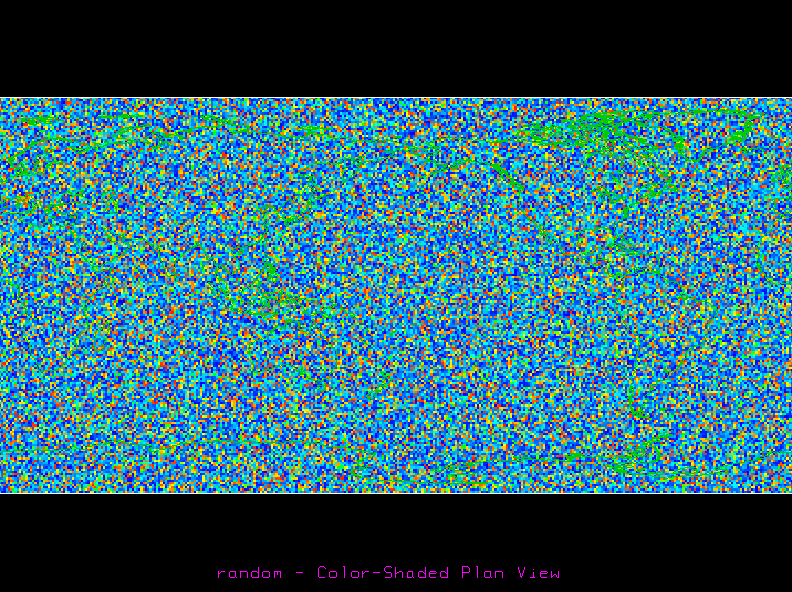

In [8]:
%make_image

## Compute  mass weighted vertical integral of water vapor and load the data into IDV

In [9]:
#open MERRA2 Reanalysis dataset
da=xr.open_dataset('https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das') 

In [10]:
da

<xarray.Dataset>
Dimensions:  (lat: 361, lev: 42, lon: 576, time: 111043)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-01T03:00:00 ...
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 875.0 850.0 825.0 ...
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 -177.5 -176.9 -176.2 ...
Data variables:
    epv      (time, lev, lat, lon) float32 ...
    h        (time, lev, lat, lon) float32 ...
    o3       (time, lev, lat, lon) float32 ...
    omega    (time, lev, lat, lon) float32 ...
    phis     (time, lat, lon) float32 ...
    ps       (time, lat, lon) float32 ...
    qi       (time, lev, lat, lon) float32 ...
    ql       (time, lev, lat, lon) float32 ...
    qv       (time, lev, lat, lon) float32 ...
    rh       (time, lev, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
    t        (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float

In [11]:
q=da.qv.isel(time=slice(0,2)) # just take a small slice of data

In [12]:
dpbyg=da.lev.copy() # make a copy of values
dpbyg.values=-1*np.gradient(da.lev*100.0)/9.8

In [16]:
CWV=(q*dpbyg).sum(dim='lev')  #should give Column Water Vapor in mm 
CWV.name='CWV'

In [17]:
CWV.to_IDV() #this data is in data sources, manually create a display

data loaded


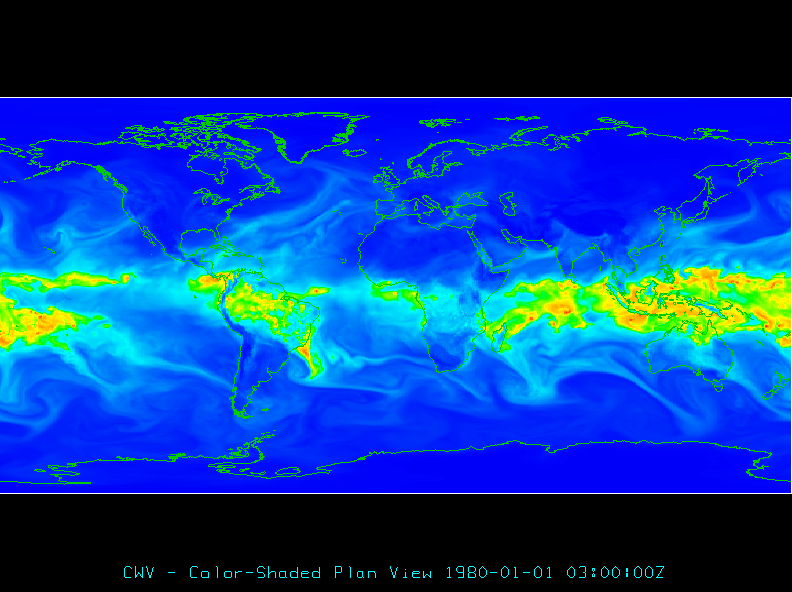

In [51]:
%make_image